In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

## step1. 開PCA機

In [26]:
pca = PCA(n_components=2)

## step2. 訓練

In [27]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## step3. 預測

In [11]:
x[75]

array([6.6, 3. , 4.4, 1.4])

In [12]:
X = pca.transform(x)

In [13]:
X[75]

array([0.90017437, 0.32850447])

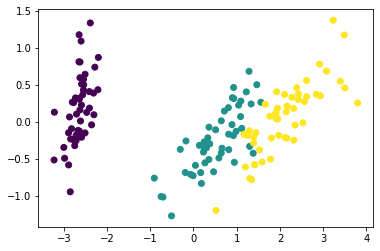

In [16]:
plt.scatter(X[:,0],X[:,1],c=y)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.svm import SVC

In [21]:
model = SVC()

In [22]:
model.fit(x_train, y_train)

C:\Users\morri\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [23]:
y_predict = model.predict(x_test)
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

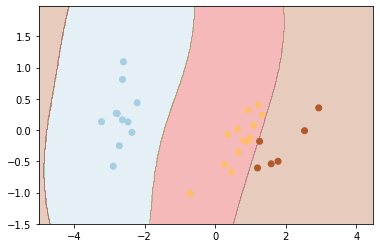

In [25]:
x0 = np.arange(-5,4.5,0.02)
y0 = np.arange(-1.5,2.0,0.02)

xm,ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = model.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test, cmap='Paired')